In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Predicting house prices based on size and number of bedrooms
# Data: [Size (sq ft), Number of Bedrooms]
A = np.array([[1400, 3],
              [1600, 3],
              [1700, 3],
              [1875, 4],
              [1100, 2]])

# Prices (target values in $1000s)
b = np.array([245, 312, 279, 308, 199])

# Append a column of ones to A for the intercept term
A = np.hstack([A, np.ones((A.shape[0], 1))]) # extra dimentions

# Compute the SVD of X
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Compute the pseudoinverse of X using SVD
S_inv = np.diag(1 / S)
A_pinv = Vt.T @ S_inv @ U.T

# Solve for the least squares solution
w = A_pinv @ b

print("Estimated coefficients:", w)
print()

# Predict price of a new house (e.g., 1500 sq ft, 3 bedrooms)
new_house = np.array([1200, 4, 1])  # Include intercept term  (sqft_to_sqm = 0.092903)
predicted_price = new_house @ w
print(f"Predicted price for a {new_house[0]} sq ft house with {new_house[1]} bedrooms: ${predicted_price * 1000:.2f}")


Estimated coefficients: [  0.16899654 -10.98615917  42.14878893]

Predicted price for a 1200 sq ft house with 4 bedrooms: $201000.00


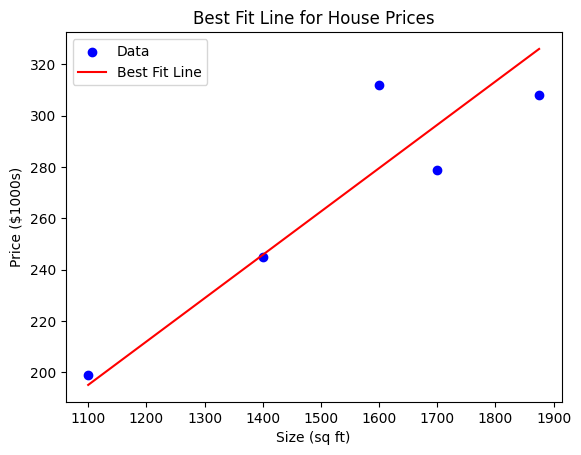

In [2]:
# Plot best fit line
plt.scatter(A[:, 0], b, color='blue', label='Data')
x_vals = np.linspace(min(A[:, 0]), max(A[:, 0]), 100)
y_vals = w[0] * x_vals + w[1] * np.mean(A[:, 1]) + w[2]
plt.plot(x_vals, y_vals, color='red', label='Best Fit Line')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($1000s)')
plt.title('Best Fit Line for House Prices')
plt.legend()
plt.show()